In [1]:
# Import library
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import words
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
origin_data = pd.read_csv('data\emails.csv')
print(origin_data.shape)
origin_data.head()

(5728, 2)


,text,class
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
def split_data(data, train_size):
    train_data = data[:int(len(data) * train_size)]
    test_data = data[int(len(data) * train_size):]
    return train_data, test_data

In [4]:
def save_data(data, filename):
    data.to_csv(filename, index=False, na_rep="")

In [5]:
origin_data = origin_data.sample(frac = 1,replace=False)
train_data, test_data = split_data(origin_data, 0.9)

print (len(train_data))
print (len(test_data))

save_data(train_data, "data/train.csv")
save_data(test_data, "data/test.csv")


5155
573


In [6]:
test= pd.read_csv('data/test.csv')
test.head()

,text,class
0,"Subject: buy oil stocks now calgary , alberta...",1
1,Subject: new basis report bhavna : the basis...,0
2,Subject: re : outage tracker option and backgr...,0
3,Subject: re : anita dupont resume oooopppss !...,0
4,Subject: template for pricing the right of fir...,0


In [7]:
# Load train dataset
data = pd.read_csv('data/train.csv')
print(data.shape)

(5155, 2)


In [8]:
# load set of words to check English words
nltk.download("words")

set_words = set(words.words())

print(list(set_words)[:10])
print(len(set_words))

['contortionist', 'oxygenizement', 'unexhibitable', 'privateer', 'Athabascan', 'gasworker', 'ush', 'flittermouse', 'politicophobia', 'wynkernel']
235892


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\TIEN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
# Create a vocabulary from the loaded train dataset
vocabulary = {}
for i in range(data.shape[0]):
        
        current_email = data.iloc[i, :][0].split()
        print(
            f"Email number: {i} out of {data.shape[0]} \
            Length of vocab: {len(vocabulary)}"
        )
        for word in current_email:
            idx = len(vocabulary)
            if word.lower() not in vocabulary and word.lower() in set_words:
                vocabulary[word] = idx
                idx += 1
            
file = open("data/vocabulary.txt", "w")
file.write(str(vocabulary))
file.close()           

Email number: 0 out of 5155             Length of vocab: 0
Email number: 1 out of 5155             Length of vocab: 41
Email number: 2 out of 5155             Length of vocab: 286
Email number: 3 out of 5155             Length of vocab: 369
Email number: 4 out of 5155             Length of vocab: 374
Email number: 5 out of 5155             Length of vocab: 396
Email number: 6 out of 5155             Length of vocab: 421
Email number: 7 out of 5155             Length of vocab: 483
Email number: 8 out of 5155             Length of vocab: 486
Email number: 9 out of 5155             Length of vocab: 497
Email number: 10 out of 5155             Length of vocab: 560
Email number: 11 out of 5155             Length of vocab: 767
Email number: 12 out of 5155             Length of vocab: 865
Email number: 13 out of 5155             Length of vocab: 967
Email number: 14 out of 5155             Length of vocab: 979
Email number: 15 out of 5155             Length of vocab: 1071
Email number: 16 out

In [10]:
# Extract frequent feature from the imported dataset
def extract_freq (data):
    file = open("data/vocabulary.txt", "r")
    contents = file.read()
    vocabulary = ast.literal_eval(contents)

    X = np.zeros((data.shape[0], len(vocabulary)))
    y = np.zeros((data.shape[0]))

    for i in range(data.shape[0]):
        email = data.iloc[i, :][0].split()

        for email_word in email:
            if email_word.lower() in vocabulary:
                X[i, vocabulary[email_word.lower()]] += 1
            else:
                continue
        y[i] = data.iloc[i, :][1]
    
    return X, y

In [11]:
data = pd.read_csv("data/train.csv")
X_train,y_train = extract_freq(data)
np.save("data/X_train.npy", X_train)
np.save("data/y_train.npy", y_train)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)


X_train shape:  (5155, 11538)
y_train shape:  (5155,)


In [12]:
test_data = pd.read_csv("data/test.csv")
X_test,y_test = extract_freq(test_data)
np.save("data/X_test.npy", X_test)
np.save("data/y_test.npy", y_test)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_test shape:  (573, 11538)
y_test shape:  (573,)


In [13]:
# Naive Bayes from scikit learn
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

# Load data and train model
X_sk = np.load("data/X_train.npy")
y_sk = np.load("data/y_train.npy")
model.fit(X_sk , y_sk )

# predict on train set
predictions = model.predict(X_sk)
accuracy = accuracy_score(y_sk, predictions)
cm = confusion_matrix(y_sk, predictions)
print("Accuracy on train set:", accuracy)
print(cm)

#predict on test set
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
print("Accuracy on test set:", accuracy)
print(cm)

Accuracy on train set: 0.9877788554801163
[[3863   51]
 [  12 1229]]
Accuracy on test set: 0.9825479930191972
[[442   4]
 [  6 121]]


In [14]:
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * precision * recall / (precision + recall)
print ("Precision: ", precision)
print ("Recall: ", recall)
print ("F1 Score: ", f1_score)

Precision:  0.968
Recall:  0.952755905511811
F1 Score:  0.9603174603174602


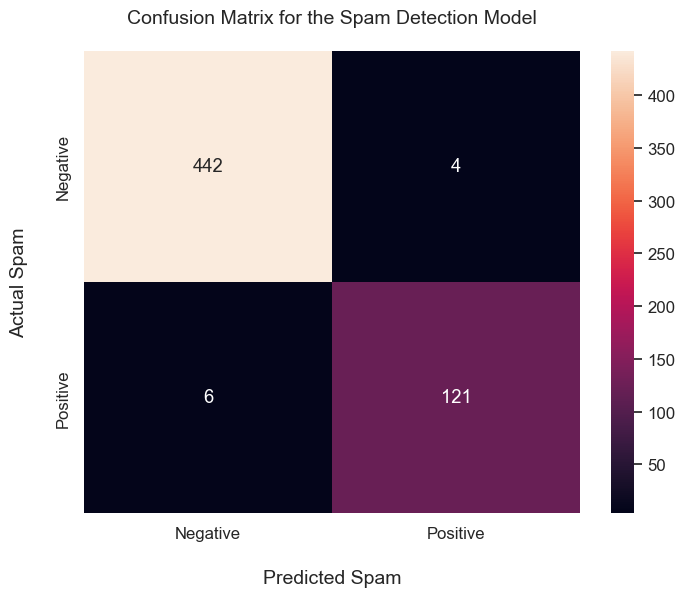

In [15]:
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1) 
ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Spam", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Spam", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Spam Detection Model", fontsize=14, pad=20)

plt.show()

In [16]:
# Extract frequent feature from the imported dataset
def get_freq (data):
    file = open("data/vocabulary.txt", "r")
    contents = file.read()
    vocabulary = ast.literal_eval(contents)

    X = np.zeros((data.shape[0], len(vocabulary)))
    y = np.zeros((data.shape[0]))

    for i in range(data.shape[0]):
        email = data.iloc[i, :][0].split()
        for email_word in email:
            if email_word.lower() in vocabulary:
                X[i, vocabulary[email_word.lower()]] += 1
            else:
                continue
    return X, y

In [41]:
# Spam Detection engine using Naive Bayes Classifier
input_email = pd.read_csv("data/real_test.csv")
actual_spam = 0
for i in range(len(input_email)):
    if input_email.loc[i, "class"] == 1:
        actual_spam += 1
print (f"Number of spam email in the input: {actual_spam}")
input_data_features,_ = extract_freq(input_email)

print(f"Input shape: {input_data_features.shape}")
prediction = model.predict(input_data_features)

spam = 0
for i in range(len(prediction)):
    if prediction[i] == 1:
        spam += 1
print(f"Number of spam email detected: {spam}")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [38]:
email_no = 10
if (prediction[email_no-1]==1):
    print(f'Email number {email_no} is a spam email')
else:
    print(f'Email number {email_no} is not a spam email')

Email number 10 is a spam email
